In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Dados fictícios: [Pressão, Colesterol]
dados_pacientes = [
    [120, 180], [118, 175], [122, 160], # Saudáveis
    [120, 260], [125, 280], [115, 270], # Colesterol Alto
    [150, 250], [160, 270], [155, 260]  # Alto Risco
]

# Criando o modelo para 3 grupos
kmeans = KMeans(n_clusters=3)
kmeans.fit(dados_pacientes)

# Obtendo os centróides e rótulos
centroides = kmeans.cluster_centers_
labels = kmeans.labels_

print(f"Centroides (Perfil Médio de cada grupo):\n{centroides}")

Centroides (Perfil Médio de cada grupo):
[[120.         270.        ]
 [120.         171.66666667]
 [155.         260.        ]]


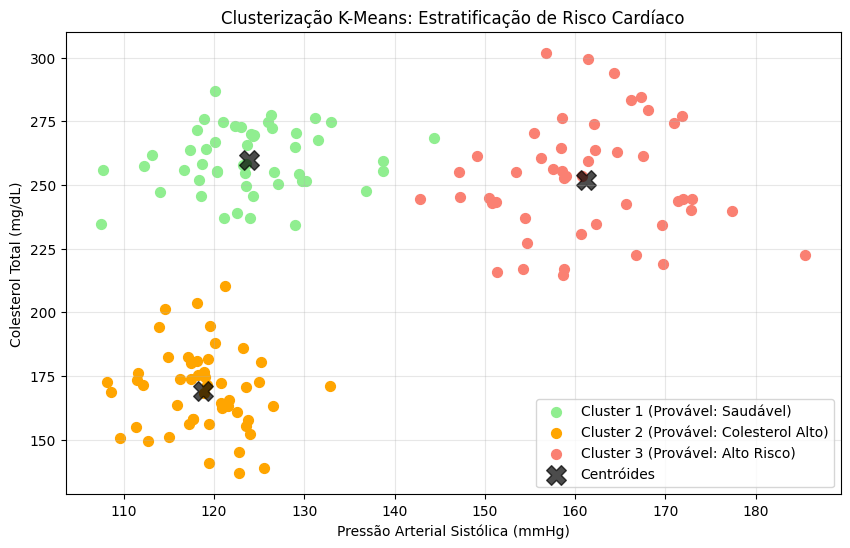

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Gerando dados fictícios (simulando 3 grupos reais)
# Grupo 1: Saudáveis (Pressão ~120, Colesterol ~170)
grupo_saudavel = np.random.normal(loc=[120, 170], scale=[5, 15], size=(50, 2))

# Grupo 2: Colesterol Alto (Pressão ~125, Colesterol ~260)
grupo_colesterol = np.random.normal(loc=[125, 260], scale=[6, 15], size=(50, 2))

# Grupo 3: Alto Risco (Pressão ~160, Colesterol ~250)
grupo_risco = np.random.normal(loc=[160, 250], scale=[10, 20], size=(50, 2))

# Juntando todos os pacientes em um único conjunto de dados
dados = np.concatenate([grupo_saudavel, grupo_colesterol, grupo_risco])

# 2. Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(dados)
y_kmeans = kmeans.predict(dados) # Define a qual grupo cada ponto pertence

# 3. Plotando o Diagrama
plt.figure(figsize=(10, 6))

# Plotar os pontos de cada cluster
plt.scatter(dados[y_kmeans == 0, 0], dados[y_kmeans == 0, 1],
            s=50, c='lightgreen', label='Cluster 1 (Provável: Saudável)')

plt.scatter(dados[y_kmeans == 1, 0], dados[y_kmeans == 1, 1],
            s=50, c='orange', label='Cluster 2 (Provável: Colesterol Alto)')

plt.scatter(dados[y_kmeans == 2, 0], dados[y_kmeans == 2, 1],
            s=50, c='salmon', label='Cluster 3 (Provável: Alto Risco)')

# Plotar os Centróides (os "representantes" de cada grupo)
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.7, marker='X', label='Centróides')

# Configurações visuais
plt.title('Clusterização K-Means: Estratificação de Risco Cardíaco')
plt.xlabel('Pressão Arterial Sistólica (mmHg)')
plt.ylabel('Colesterol Total (mg/dL)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

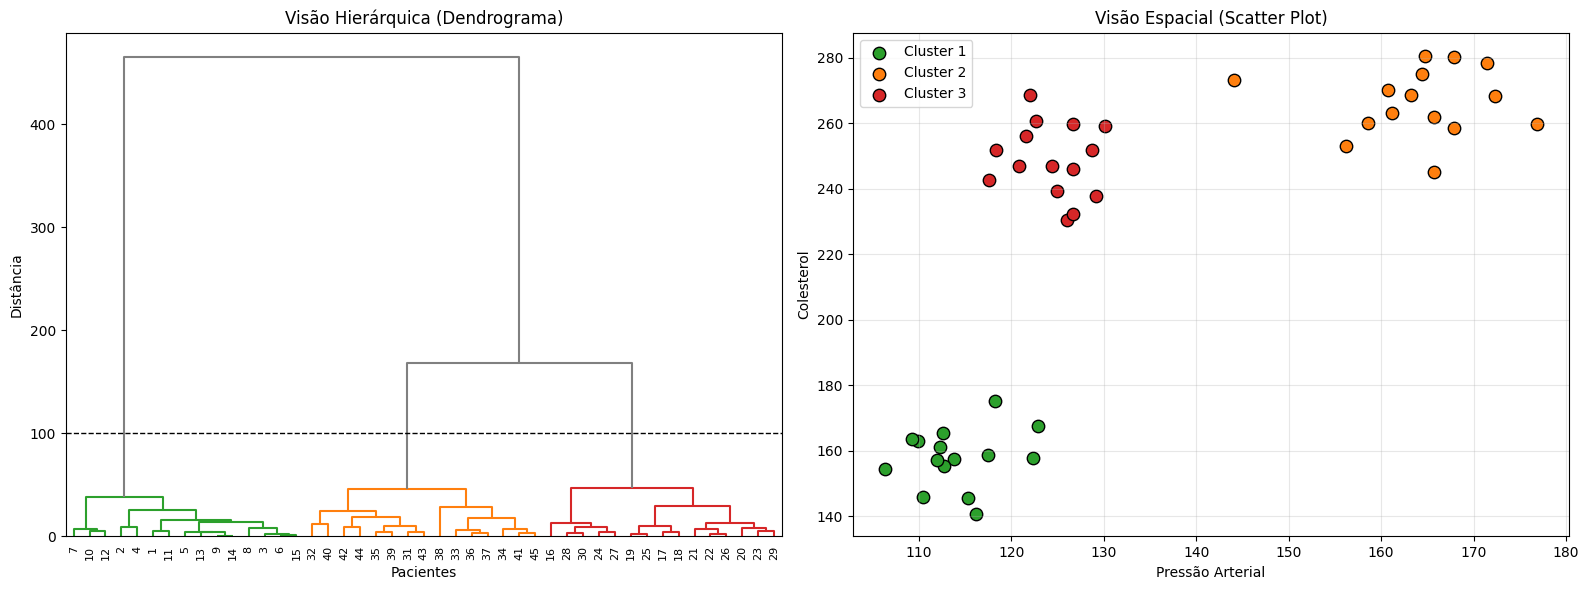

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

# --- 1. PREPARAÇÃO DOS DADOS ---
np.random.seed(42)

# Grupo 1 (Saudáveis)
grupo_a = np.random.normal(loc=[115, 160], scale=[5, 10], size=(15, 2))
# Grupo 2 (Colesterol Alto)
grupo_b = np.random.normal(loc=[125, 250], scale=[5, 10], size=(15, 2))
# Grupo 3 (Alto Risco)
grupo_c = np.random.normal(loc=[165, 265], scale=[8, 10], size=(15, 2))

dados = np.concatenate([grupo_a, grupo_b, grupo_c])

# Cálculo da Árvore (Linkage)
Z = linkage(dados, method='ward')

# Definição do Corte
distancia_corte = 100

# Obtenção dos Rótulos (1, 2, 3...)
# Isso diz a qual grupo cada ponto pertence
rotulos = fcluster(Z, t=distancia_corte, criterion='distance')


# --- 2. CONFIGURAÇÃO DE CORES ---
# Vamos definir nossas cores personalizadas
# Ordem usual do scipy: Verde (1), Laranja (2), Vermelho (3) para este dataset específico
minhas_cores = ['#2ca02c', '#ff7f0e', '#d62728'] # Verde, Laranja, Vermelho (hex codes)

# Aplicar essa paleta ao Dendrograma
set_link_color_palette(minhas_cores)


# --- 3. PLOTAGEM LADO A LADO ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- GRÁFICO 1: O DENDROGRAMA ---
dendrogram(
    Z,
    labels=range(1, 46),
    color_threshold=distancia_corte,
    above_threshold_color='grey',
    ax=ax1 # Plotar no eixo da esquerda
)
ax1.axhline(y=distancia_corte, c='black', lw=1, linestyle='--', label='Corte')
ax1.set_title("Visão Hierárquica (Dendrograma)")
ax1.set_ylabel("Distância")
ax1.set_xlabel("Pacientes")

# --- GRÁFICO 2: O ESPAÇO 2D ---
# Aqui fazemos um loop para plotar cada grupo com a cor correspondente da paleta
# O Scipy numera os clusters (1, 2, 3). Vamos iterar sobre eles.

# Nota: A ordem das cores no dendrograma depende de qual cluster é formado primeiro.
# Para este exemplo visual, mapeamos:
# Cluster formado 1 -> Cor 1 (Verde)
# Cluster formado 2 -> Cor 2 (Laranja)
# Cluster formado 3 -> Cor 3 (Vermelho)

# Identificar quais rótulos existem (ex: 1, 2, 3)
grupos_unicos = np.unique(rotulos)

for i, grupo_id in enumerate(grupos_unicos):
    # Seleciona apenas os pontos deste grupo
    pontos_grupo = dados[rotulos == grupo_id]
    
    # Plota com a cor correspondente da nossa lista 'minhas_cores'
    # O uso de 'i % len' garante que não falte cor se tivermos muitos grupos
    cor_atual = minhas_cores[i % len(minhas_cores)]
    
    ax2.scatter(pontos_grupo[:, 0], pontos_grupo[:, 1], 
                c=cor_atual, s=80, edgecolor='black', label=f'Cluster {grupo_id}')

ax2.set_title("Visão Espacial (Scatter Plot)")
ax2.set_xlabel("Pressão Arterial")
ax2.set_ylabel("Colesterol")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

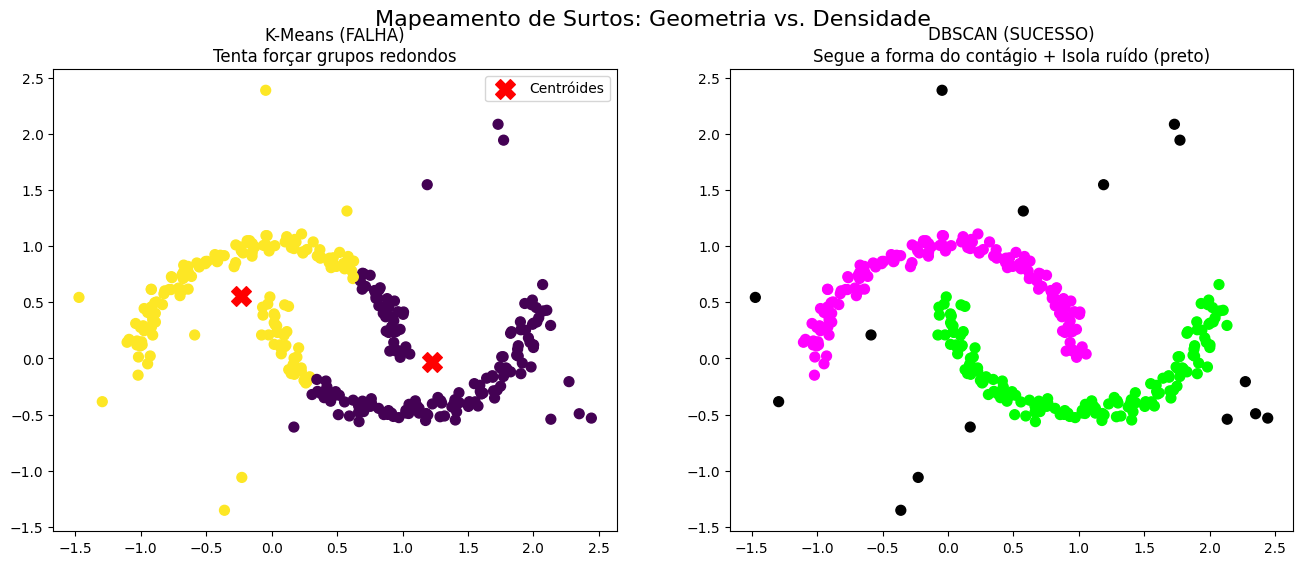

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons

# 1. Gerando o Cenário Epidemiológico (Focos em Curva)
# make_moons cria dois arcos entrelaçados (difícil para K-Means)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Adicionando Ruído (Casos isolados/aleatórios na cidade)
# Geramos 20 pontos aleatórios espalhados
ruido = np.random.uniform(low=-1.5, high=2.5, size=(20, 2))
dados_epidemia = np.vstack([X, ruido])

# --- MODELO 1: K-MEANS (A tentativa falha) ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(dados_epidemia)

# --- MODELO 2: DBSCAN (A solução baseada em densidade) ---
# eps=0.2: Distância máxima para considerar um vizinho "contagiado"
# min_samples=5: Mínimo de pessoas juntas para considerar um "foco"
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(dados_epidemia)


# --- PLOTANDO O CONFRONTO ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: O erro do K-Means
ax1.scatter(dados_epidemia[:, 0], dados_epidemia[:, 1], c=labels_kmeans, cmap='viridis', s=50)
# Vamos marcar os centros que o K-Means "achou" que existiam
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centróides')
ax1.set_title("K-Means (FALHA)\nTenta forçar grupos redondos")
ax1.legend()

# Gráfico 2: O sucesso do DBSCAN
# Nota: DBSCAN marca ruído com o rótulo -1. Vamos pintar o ruído de preto.
# Usamos uma lógica simples de cores aqui para destacar
cores = np.array(['black' if x == -1 else 'lime' if x == 0 else 'magenta' for x in labels_dbscan])

ax2.scatter(dados_epidemia[:, 0], dados_epidemia[:, 1], c=cores, s=50)
ax2.set_title("DBSCAN (SUCESSO)\nSegue a forma do contágio + Isola ruído (preto)")

plt.suptitle("Mapeamento de Surtos: Geometria vs. Densidade", fontsize=16)
plt.show()

/home/santanche/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


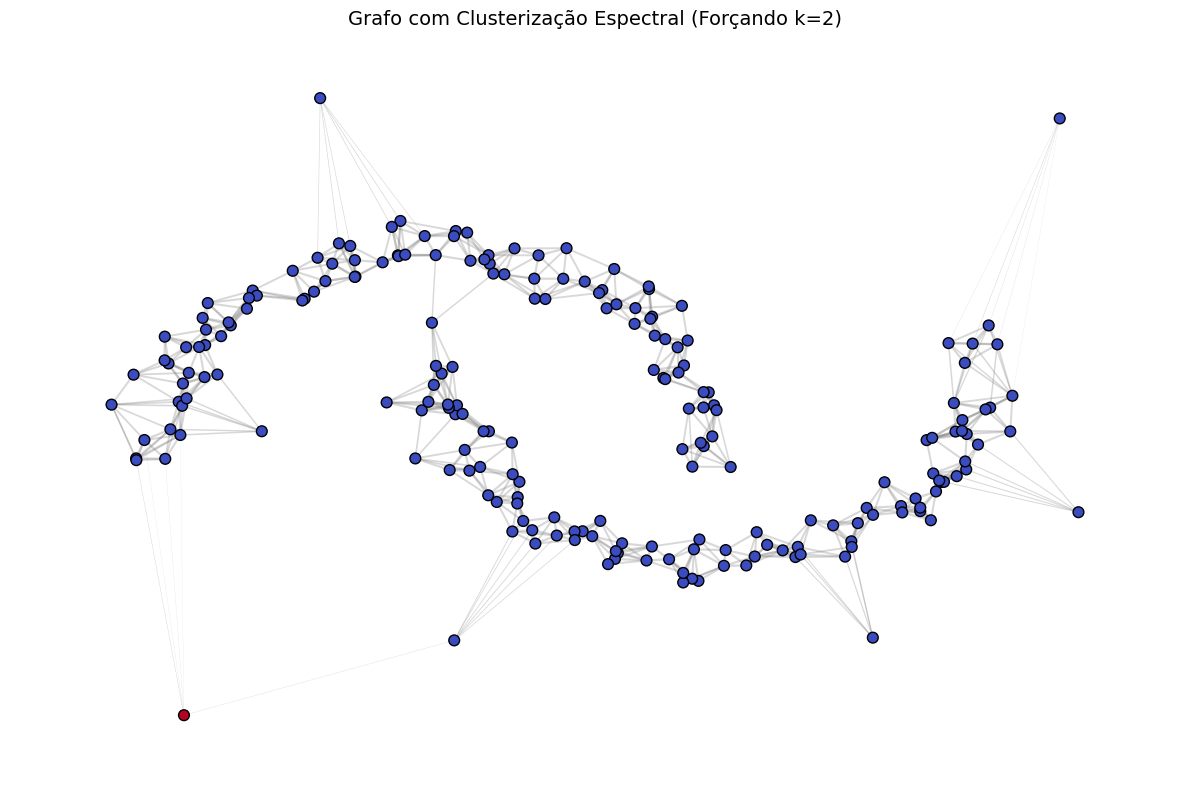

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import networkx as nx

# --- 1. GERAR DADOS (Luas + Ruído) ---
N_SAMPLES = 200
X_moons, _ = make_moons(n_samples=N_SAMPLES, noise=0.07, random_state=42)
ruido = np.random.uniform(low=-1.5, high=2.5, size=(10, 2)) # Reduzi o ruído para clareza
dados = np.vstack([X_moons, ruido])
n_total = len(dados)

# --- 2. CONSTRUÇÃO DO GRAFO (k-NN) ---
# Conecta cada ponto aos 6 vizinhos mais próximos
A = kneighbors_graph(dados, n_neighbors=6, mode='distance', include_self=False)
G = nx.from_scipy_sparse_array(A)

# Definindo pesos visuais (similaridade)
for u, v, d in G.edges(data=True):
    distancia = d['weight']
    G[u][v]['similaridade_visual'] = np.exp(-distancia / 0.5)

# --- 3. CLUSTERIZAÇÃO ESPECTRAL (Forçando k=2) ---
# Esta técnica analisa os autovetores do grafo para encontrar a melhor divisão binária
# affinity='precomputed' significa que vamos passar nossa própria matriz de conexões (A)
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)

# Nota: O Spectral Clustering espera uma matriz de similaridade, não distância.
# Vamos converter a matriz de distâncias A para similaridade rapidamente:
matriz_similaridade = np.exp(-A.toarray() / 0.5) 

# Ajuste fino: O algoritmo funciona melhor se a diagonal for 0
np.fill_diagonal(matriz_similaridade, 0)

# Obter os rótulos (0 ou 1)
labels = sc.fit_predict(matriz_similaridade)

# --- 4. VISUALIZAÇÃO ---
plt.figure(figsize=(12, 8))
plt.title("Grafo com Clusterização Espectral (Forçando k=2)", fontsize=14)

posicoes = {i: dados[i] for i in range(n_total)}
espessuras = [G[u][v]['similaridade_visual'] * 2 for u, v in G.edges()]

# Desenhar Nós (Coloridos pelos 2 labels encontrados)
# cmap='coolwarm' vai usar Azul para um grupo e Vermelho para o outro
nx.draw_networkx_nodes(G, posicoes, node_size=60, 
                       node_color=labels, cmap='coolwarm', edgecolors='black')

# Desenhar Arestas
nx.draw_networkx_edges(G, posicoes, width=espessuras, alpha=0.3, edge_color='gray')

plt.axis('off')
plt.tight_layout()
plt.show()

/home/santanche/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


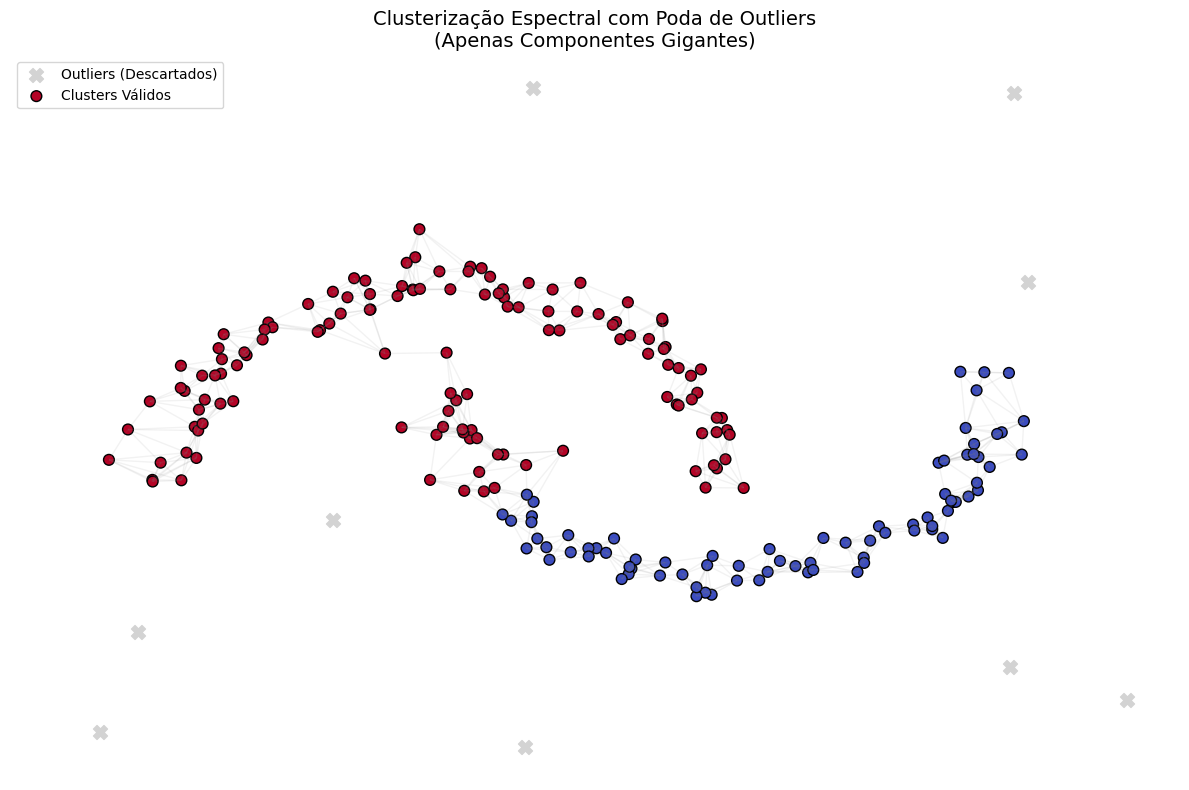

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import networkx as nx

# --- 1. GERAR DADOS ---
N_SAMPLES = 200
X_moons, _ = make_moons(n_samples=N_SAMPLES, noise=0.07, random_state=42)
ruido = np.random.uniform(low=-1.5, high=2.5, size=(15, 2))
dados = np.vstack([X_moons, ruido])

# --- 2. PRÉ-PROCESSAMENTO: LIMPEZA DO GRAFO ---

# A. Criar o Grafo inicial (k=6)
# Usamos mode='distance' para poder podar arestas longas depois
A = kneighbors_graph(dados, n_neighbors=6, mode='distance', include_self=False)
G = nx.from_scipy_sparse_array(A)

# B. PODA (Edge Pruning)
LIMITE_DISTANCIA = 0.3
arestas_para_remover = []
for u, v, d in G.edges(data=True):
    if d['weight'] > LIMITE_DISTANCIA:
        arestas_para_remover.append((u, v))

G.remove_edges_from(arestas_para_remover)

# C. FILTRAGEM DE COMPONENTES (Remover ilhas pequenas/ruído)
componentes = list(nx.connected_components(G))

nos_validos = []
nos_ruido = []

for comp in componentes:
    if len(comp) > 10: # Só aceita grupos com mais de 10 nós
        nos_validos.extend(list(comp))
    else:
        nos_ruido.extend(list(comp))

# --- 3. PREPARAR DADOS LIMPOS ---
indices_validos = np.array(nos_validos)
dados_limpos = dados[indices_validos]

# Recalcular a matriz apenas para os dados limpos
# IMPORTANTE: Usamos mode='connectivity' para criar uma matriz de 0s e 1s.
# Isso serve perfeitamente como uma matriz de afinidade (similaridade) para o Spectral Clustering.
matriz_limpa = kneighbors_graph(dados_limpos, n_neighbors=6, mode='connectivity', include_self=False)

# --- 4. CLUSTERIZAÇÃO ESPECTRAL (CORREÇÃO AQUI) ---
# Mudamos affinity para 'precomputed'.
# Isso evita o erro de contagem de vizinhos. O algoritmo apenas aceita a matriz como ela é.
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
labels_limpos = sc.fit_predict(matriz_limpa)

# --- 5. VISUALIZAÇÃO ---
plt.figure(figsize=(12, 8))
plt.title(f"Clusterização Espectral com Poda de Outliers\n(Apenas Componentes Gigantes)", fontsize=14)

# Plotar os OUTLIERS (Cinza)
if len(nos_ruido) > 0:
    dados_ruido = dados[np.array(nos_ruido)]
    plt.scatter(dados_ruido[:, 0], dados_ruido[:, 1], c='lightgray', s=100, marker='X', label='Outliers (Descartados)')

# Plotar os CLUSTERS VÁLIDOS (Coloridos)
plt.scatter(dados_limpos[:, 0], dados_limpos[:, 1], c=labels_limpos, cmap='coolwarm', s=60, edgecolor='k', label='Clusters Válidos')

# Desenhar as arestas do grafo limpo (apenas para visualização)
G_limpo = G.subgraph(nos_validos)
# Precisamos remapear os índices para desenhar as arestas corretamente na posição certa
pos_completa = {i: dados[i] for i in range(len(dados))}
nx.draw_networkx_edges(G_limpo, pos_completa, alpha=0.1, edge_color='gray')

plt.legend()
plt.axis('off')
plt.tight_layout()
plt.show()